In [4]:
'''
Looking at the entropy of different positions for each protein in covid. Connecting these to all possible epitopes across all window lengths.
'''

import gzip
from Bio import SeqIO
from Bio.Seq import Seq
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [5]:
### There is no longer an ORF14, which produced a very small protein
amino_acid_files = !ls data/larger_version_modified/*_protein_*


amino_acid_files

['data/larger_version_modified/aligned_protein_E.fasta',
 'data/larger_version_modified/aligned_protein_M.fasta',
 'data/larger_version_modified/aligned_protein_N.fasta',
 'data/larger_version_modified/aligned_protein_ORF10.fasta',
 'data/larger_version_modified/aligned_protein_ORF1a.fasta',
 'data/larger_version_modified/aligned_protein_ORF1b.fasta',
 'data/larger_version_modified/aligned_protein_ORF3a.fasta',
 'data/larger_version_modified/aligned_protein_ORF6.fasta',
 'data/larger_version_modified/aligned_protein_ORF7a.fasta',
 'data/larger_version_modified/aligned_protein_ORF7b.fasta',
 'data/larger_version_modified/aligned_protein_ORF8.fasta',
 'data/larger_version_modified/aligned_protein_ORF9b.fasta',
 'data/larger_version_modified/aligned_protein_S.fasta']

In [6]:
len(amino_acid_files)

13

In [9]:
aa_file = amino_acid_files[0]
protein = aa_file.split('_')[-1].split('.')[0]
print('protein = ', protein)
with open(aa_file, "rt") as handle:
    records = list(SeqIO.parse(handle, "fasta"))
print('total size of records, including the NODES', len(records))
# getting rid of the node sequences!
no_nodes = []
for r in records: 
    if 'NODE_' not in r.id:
        no_nodes.append(r)
# records = no_nodes
print(records[0])
print(len(records))
print(no_nodes[0])
print(len(no_nodes))

protein =  E
total size of records, including the NODES 23732
ID: Wuhan-Hu-1/2019
Name: Wuhan-Hu-1/2019
Description: Wuhan-Hu-1/2019
Number of features: 0
Seq('MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNIVNVSLVKP...LV*', SingleLetterAlphabet())
23732
ID: Wuhan-Hu-1/2019
Name: Wuhan-Hu-1/2019
Description: Wuhan-Hu-1/2019
Number of features: 0
Seq('MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNIVNVSLVKP...LV*', SingleLetterAlphabet())
12789


protein =  E
total size of records, including the NODES 23732
total size after excluding the NODES =  12789
12789
protein =  M
total size of records, including the NODES 23732
total size after excluding the NODES =  12789
12789
protein =  N
total size of records, including the NODES 23732
total size after excluding the NODES =  12789
12789
protein =  ORF10
total size of records, including the NODES 23732
total size after excluding the NODES =  12789
12789
protein =  ORF1a
total size of records, including the NODES 23732
total size after excluding the NODES =  12789
12789
protein =  ORF1b
total size of records, including the NODES 23732
total size after excluding the NODES =  12789
12789
protein =  ORF3a
total size of records, including the NODES 23732
total size after excluding the NODES =  12789
12789
protein =  ORF6
total size of records, including the NODES 23732
total size after excluding the NODES =  12789
12789
protein =  ORF7a
total size of records, including the NODES 23732
tot

,protein,sequence,prob_mutation
0,E,MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNI...,"[0.0, 0.0, 7.819831091648854e-05, 0.0001563966..."
1,M,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,"[0.0, 0.0045355020331561136, 0.008210822646230..."
2,N,MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLP...,"[0.0, 0.005082890209571422, 0.0282295902408508..."
3,ORF10,MGYINVFAFPFTIYSLLLCRMNSRNYIAQVDVVNFNLT,"[0.00023459493274946563, 7.819831091648854e-05..."
4,ORF1a,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,"[0.0, 0.0, 0.0, 7.819831091648854e-05, 0.00015..."


0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4
2 0
2 1
2 2


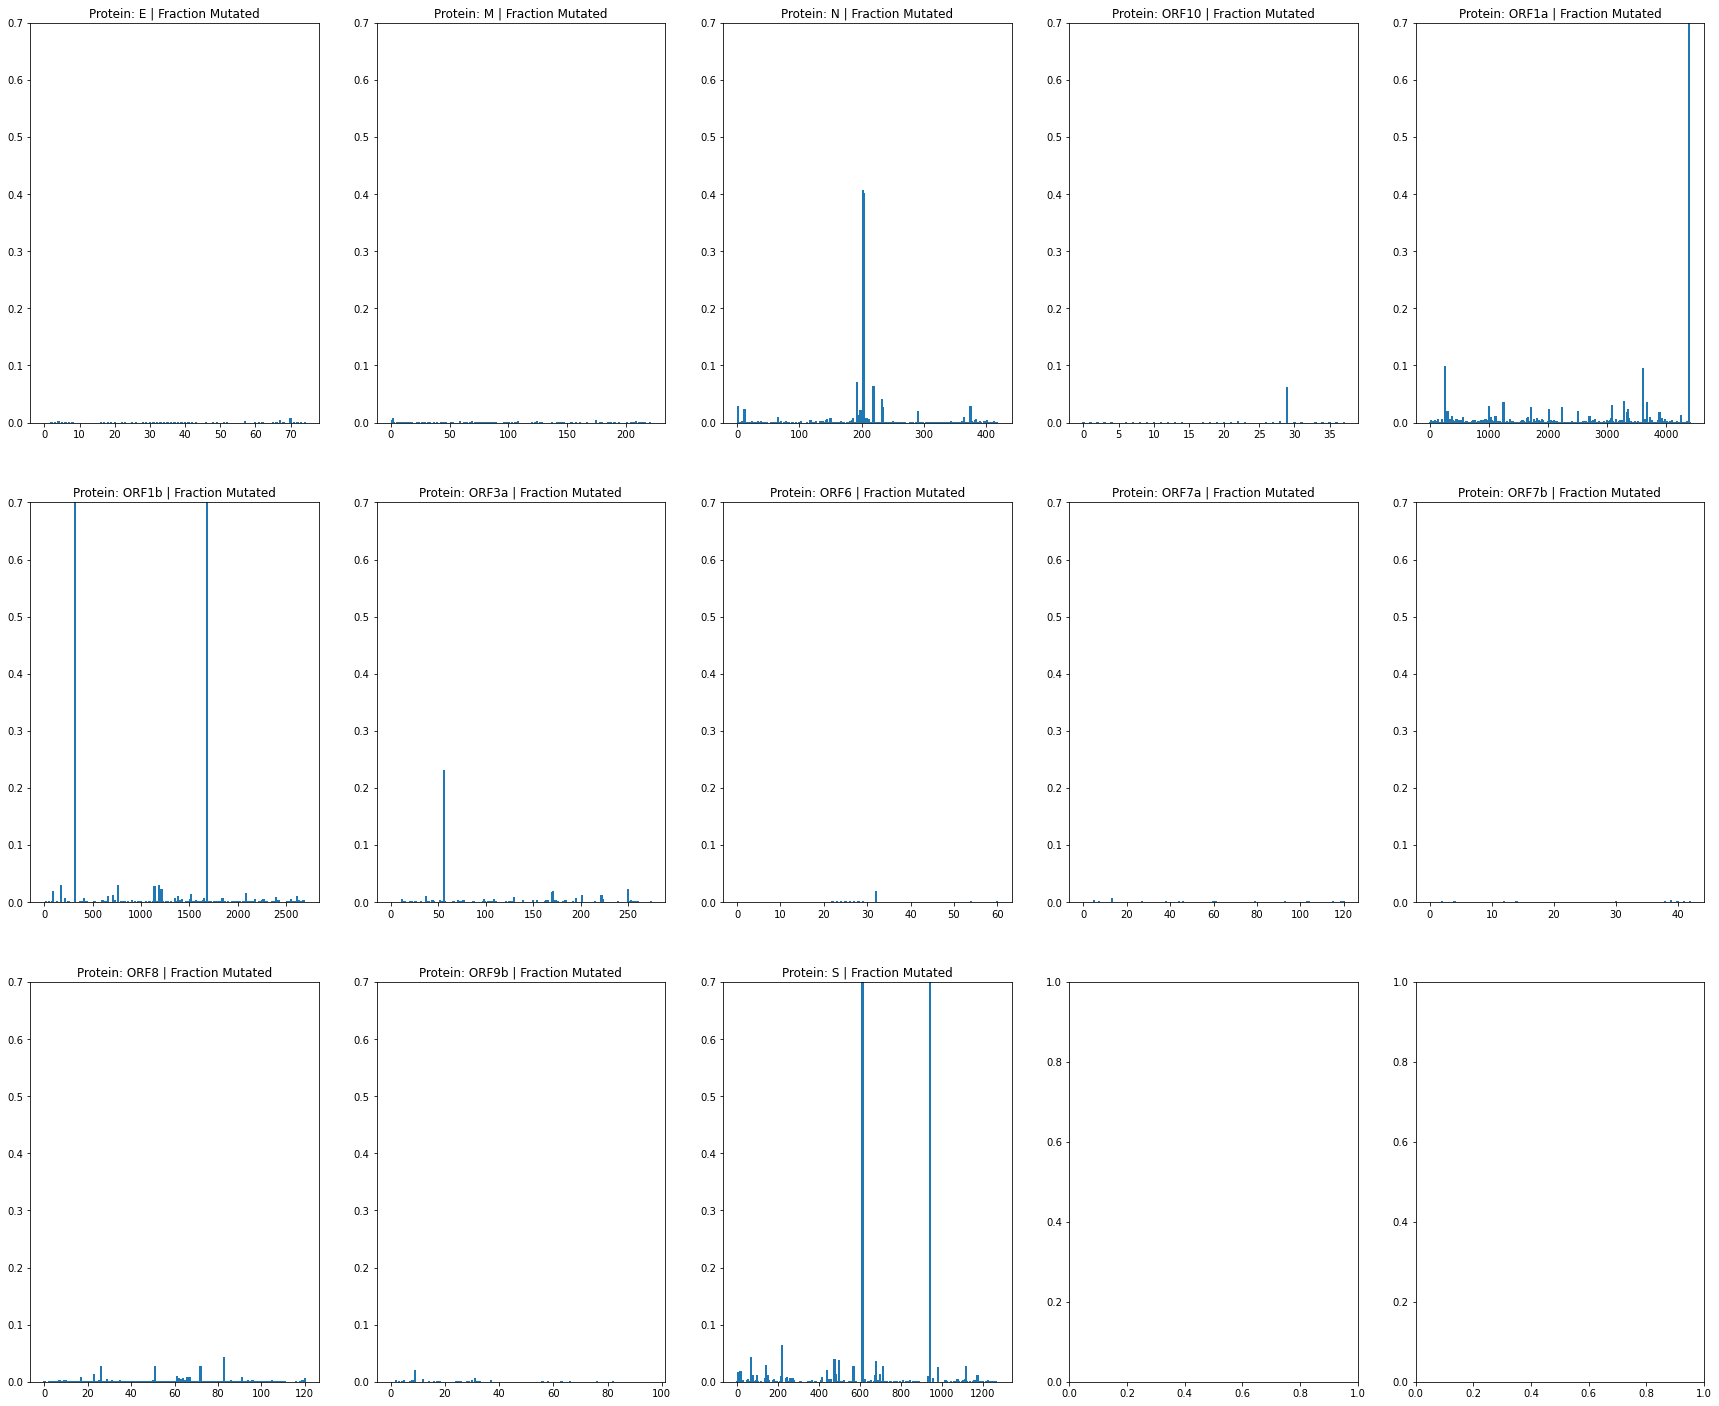

In [10]:
'''  DOING BINARY PROBABILITY OF MUTATING '''

### I had to change some code, because the sequence 'Wuhan/IPBCAMS-WH-01/2019' is no longer readily available,
### probably due to the weird tree build, so I added it to all the files. --Alex


df = [] # will store the entropy results
for aa_file in amino_acid_files:
    protein = aa_file.split('_')[-1].split('.')[0]
    print('protein = ', protein)
    with open(aa_file, "rt") as handle:
        records = list(SeqIO.parse(handle, "fasta"))
    print('total size of records, including the NODES', len(records))
    # getting rid of the node sequences!
    no_nodes = []
    for r in records: 
        if 'NODE_' not in r.id:
            no_nodes.append(r)
    print('total size after excluding the NODES = ', len(no_nodes))
    records = no_nodes

    ### Old code
#     # getting the reference sequence ### Commented out by Alex
#     for ind, r in enumerate(records):  ### Commented out by Alex
#         if r.id == 'Wuhan/IPBCAMS-WH-01/2019':#'Wuhan-Hu-1/2019':#'Wuhan/WH01/2019':#'Wuhan/IPBCAMS-WH-01/2019': ### Commented out by Alex
#             ref_seq_ind = ind ### Commented out by Alex
            
#     ref_seq = str(records[ref_seq_ind].seq)[:-1] ### Commented out by Alex
    
    
    # getting the Wuhan Hu sequence
    
    for ind, r in enumerate(records): 
        if r.id == 'Wuhan-Hu-1/2019':#'Wuhan-Hu-1/2019':#'Wuhan/WH01/2019':#'Wuhan/IPBCAMS-WH-01/2019':
            ref_seq_ind_wu = ind


    ref_seq_wu = str(records[ref_seq_ind_wu].seq)[:-1]
    ref_seq = ref_seq_wu ### --Alex
    
    ### Old code
#     print('protein', protein,'ref equals wuhan', (np.array(list(ref_seq))!=np.array(list(ref_seq_wu))).sum()) ### Commented out by Alex
#     diff_inds = np.arange(len(ref_seq))[(np.array(list(ref_seq))!=np.array(list(ref_seq_wu)))] ### Commented out by Alex
#     print('points where they differ', diff_inds ) ### Commented out by Alex
#     print('differences: Org sequence', np.array(list(ref_seq))[diff_inds], 'Wuhan-Hu_1,', np.array(list(ref_seq_wu))[diff_inds] ) ### Commented out by Alex  
    # calculating entropy
    
    seqs = np.array(records)[:, :-1]
    pos_mut_counts = []
    for ind in range(seqs.shape[1]):
        counter = dict()
        # count the AA frequencies
        ground_aa = ref_seq[ind]
        
        for char in seqs[:, ind]:
            try: 
                counter[char]+=1
            except: 
                counter[char] = 1
        # actual entropy calculation
        
        num_same = 0
        for aa, val in counter.items():
            if aa == ground_aa:
                num_same +=val
        pos_mut_counts.append(1-((num_same-1)/(seqs.shape[0]-1)))
    
    print(len(records))

    df.append( [protein, ref_seq, pos_mut_counts]  )
    
df = pd.DataFrame(df, columns=['protein','sequence', 'prob_mutation'])
display(df.head())

rows, cols = 3, 5
fig, ax = plt.subplots(rows,cols, figsize=(30,25))
for i in range(df.shape[0]):
    x_ind = i//cols
    y_ind = i%cols
    print(x_ind, y_ind)
    wid = len(df.iloc[i].prob_mutation) / 120
    ax[x_ind, y_ind].set_ylim(0, 0.7)
    ax[x_ind, y_ind].bar(np.arange(len(df.iloc[i].prob_mutation)), 
                         df.iloc[i].prob_mutation, width=wid)
    
    ax[x_ind, y_ind].set_title('Protein: '+df.iloc[i].protein+' | Fraction Mutated')

In [11]:
len(df.loc[3,'prob_mutation'])
df

,protein,sequence,prob_mutation
0,E,MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNI...,"[0.0, 0.0, 7.819831091648854e-05, 0.0001563966..."
1,M,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,"[0.0, 0.0045355020331561136, 0.008210822646230..."
2,N,MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLP...,"[0.0, 0.005082890209571422, 0.0282295902408508..."
3,ORF10,MGYINVFAFPFTIYSLLLCRMNSRNYIAQVDVVNFNLT,"[0.00023459493274946563, 7.819831091648854e-05..."
4,ORF1a,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,"[0.0, 0.0, 0.0, 7.819831091648854e-05, 0.00015..."
5,ORF1b,RVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCR...,"[0.0, 0.0, 0.0, 0.0, 0.0, 7.819831091648854e-0..."
6,ORF3a,MDLFMRIFTIGTVTLKQGEIKDATPSDFVRATATIPIQASLPFGWL...,"[0.00023459493274946563, 0.0003127932436659542..."
7,ORF6,MFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSLTE...,"[0.00023459493274946563, 0.00101657804191424, ..."
8,ORF7a,MKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPF...,"[0.0005473881764154198, 0.0003909915545824427,..."
9,ORF7b,MIELSLIDFYLCFLAFLLFLVLIMLIIFWFSLELQDHNETCHA,"[0.0005473881764154198, 0.00101657804191424, 0..."


In [12]:
df.head()

,protein,sequence,prob_mutation
0,E,MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNI...,"[0.0, 0.0, 7.819831091648854e-05, 0.0001563966..."
1,M,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,"[0.0, 0.0045355020331561136, 0.008210822646230..."
2,N,MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLP...,"[0.0, 0.005082890209571422, 0.0282295902408508..."
3,ORF10,MGYINVFAFPFTIYSLLLCRMNSRNYIAQVDVVNFNLT,"[0.00023459493274946563, 7.819831091648854e-05..."
4,ORF1a,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,"[0.0, 0.0, 0.0, 7.819831091648854e-05, 0.00015..."


In [13]:
(np.array(df[df.protein=='S'].iloc[0].prob_mutation)==0.0).sum()

588

In [14]:
5826*0.001

5.8260000000000005

In [15]:
num_mut = 5
above_mut_thresh = []
for i in range(df.shape[0]):
    actual_mut_threshold = 0.001
    num_above_thresh = (np.array(df.iloc[i].prob_mutation)>actual_mut_threshold).sum()
    above_mut_thresh.append( [df.iloc[i].protein, num_mut, num_above_thresh, num_above_thresh/len(df.iloc[i].prob_mutation)] )
above_mut_thresh = pd.DataFrame(above_mut_thresh)
above_mut_thresh.columns = ['protein', 'num_mut', 'num_above_thresh', '%abovethresh']
above_mut_thresh

,protein,num_mut,num_above_thresh,%abovethresh
0,E,5,7,0.093333
1,M,5,13,0.058559
2,N,5,86,0.205251
3,ORF10,5,10,0.263158
4,ORF1a,5,363,0.082500
5,ORF1b,5,181,0.067161
6,ORF3a,5,82,0.298182
7,ORF6,5,13,0.213115
8,ORF7a,5,22,0.181818
9,ORF7b,5,14,0.325581


In [122]:
df[df['protein']=='S'].sequence.str.index('GVGYQPY')

12    501
Name: sequence, dtype: int64

In [123]:
len(df[df['protein']=='S'].sequence.iloc[0])

1273

In [124]:
df[df['protein']=='S'].sequence.iloc[0]

'MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITG

In [125]:
RBM = df[df['protein']=='S'].sequence.str[436:508].to_list()[0] # this is the binding motif that makes contact with ACE2
RBM_start = 436
RBM_end = 508
RBM

'NSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPY'

In [126]:
RBD = df[df['protein']=='S'].sequence.str[330:524].to_list()[0]
RBD

'NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATV'

In [127]:
len(RBD)

194

In [128]:
df[df['protein']=='S']

,protein,sequence,prob_mutation
12,S,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,"[0.0, 0.0001563966218329771, 0.001876759461995..."


Text(0.5, 1.0, 'RBD Fraction Mutated')

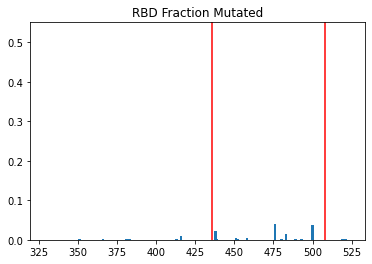

In [129]:
RBD_start = 330
RBD_end = 524

prob_mutation = df[df['protein']=='S'].prob_mutation.to_list()[0]

plt.figure()
wid = len(prob_mutation[RBD_start:RBD_end]) / 120
plt.ylim(0, 0.55)
plt.bar(np.arange(RBD_start,RBD_end), prob_mutation[RBD_start:RBD_end], width=wid)
plt.axvline(RBM_start, color='red')
plt.axvline(RBM_end, color='red')
plt.title('RBD Fraction Mutated')


Text(0.5, 1.0, 'S Protein Fraction Mutated')

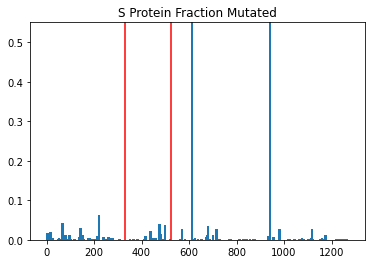

In [130]:
plt.figure()
plt.ylim(0, 0.55)
plt.bar(np.arange(0,len(prob_mutation)), prob_mutation, width=10.0)
plt.axvline(RBD_start, color='red')
plt.axvline(RBD_end, color='red')
plt.title('S Protein Fraction Mutated')

In [131]:
## ENTROPY IN BITS AND PERPLEXITY

df = [] # will store the entropy results
for aa_file in amino_acid_files:
    protein = aa_file.split('_')[-1].split('.')[0]
    with open(aa_file, "rt") as handle:
        records = list(SeqIO.parse(handle, "fasta"))
        
    # getting rid of the node sequences!
    no_nodes = []
    for r in records: 
        if 'NODE_' not in r.id:
            no_nodes.append(r)
    records = no_nodes
        
    # calculating entropy
    seqs = np.array(records)[:, :-1]
    pos_entropies = []
    for ind in range(seqs.shape[1]):
        counter = dict()
        # count the AA frequencies
        for char in seqs[:, ind]:
            try: 
                counter[char]+=1
            except: 
                counter[char] = 1
        # actual entropy calculation
        ent = 0
        for val in counter.values():
            prob = val/seqs.shape[0]
            ent += prob* np.log2(prob)
        pos_entropies.append(-ent)
    
    for ind, r in enumerate(records): 
#         if r.id == 'Wuhan/IPBCAMS-WH-01/2019': ### commented out by Alex
        if r.id == 'Wuhan-Hu-1/2019': ### --Alex
            ref_seq = ind
            
    print(len(records))
    
    perplexities = 2**np.asarray(pos_entropies)

    df.append( [protein, str(records[ref_seq].seq)[:-1], pos_entropies, perplexities]  )
    
### used to be 4236
### then 4690

12789
12789
12789
12789
12789
12789
12789
12789
12789
12789
12789
12789
12789


In [133]:
df = pd.DataFrame(df, columns=['protein','sequence', 'entropies', 'perplexities'])
df.head()

,protein,sequence,entropies,perplexities
0,E,MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNI...,"[-0.0, -0.0, 0.0011795491810428478, 0.00220270...","[1.0, 1.0, 1.000817935516133, 1.00152796501366..."
1,M,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,"[-0.0, 0.04597049747023445, 0.0717044160613552...","[1.0, 1.0323774235668415, 1.0509575635070916, ..."
2,N,MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLP...,"[-0.0, 0.05493851816114793, 0.1976833935443112...","[1.0, 1.0388148322596233, 1.1468553136214392, ..."
3,ORF10,MGYINVFAFPFTIYSLLLCRMNSRNYIAQVDVVNFNLT,"[0.003382236685534581, 0.0011795491810428478, ...","[1.0023471380484748, 1.000817935516133, 1.0052..."
4,ORF1a,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,"[-0.0, -0.0, -0.0, 0.0011795491810428478, 0.00...","[1.0, 1.0, 1.0, 1.000817935516133, 1.001527965..."


In [136]:
# testing that the entropy and sequence are the same length. 
len(df.iloc[0].sequence) == len(df.iloc[0].entropies)

True

0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4
2 0
2 1
2 2


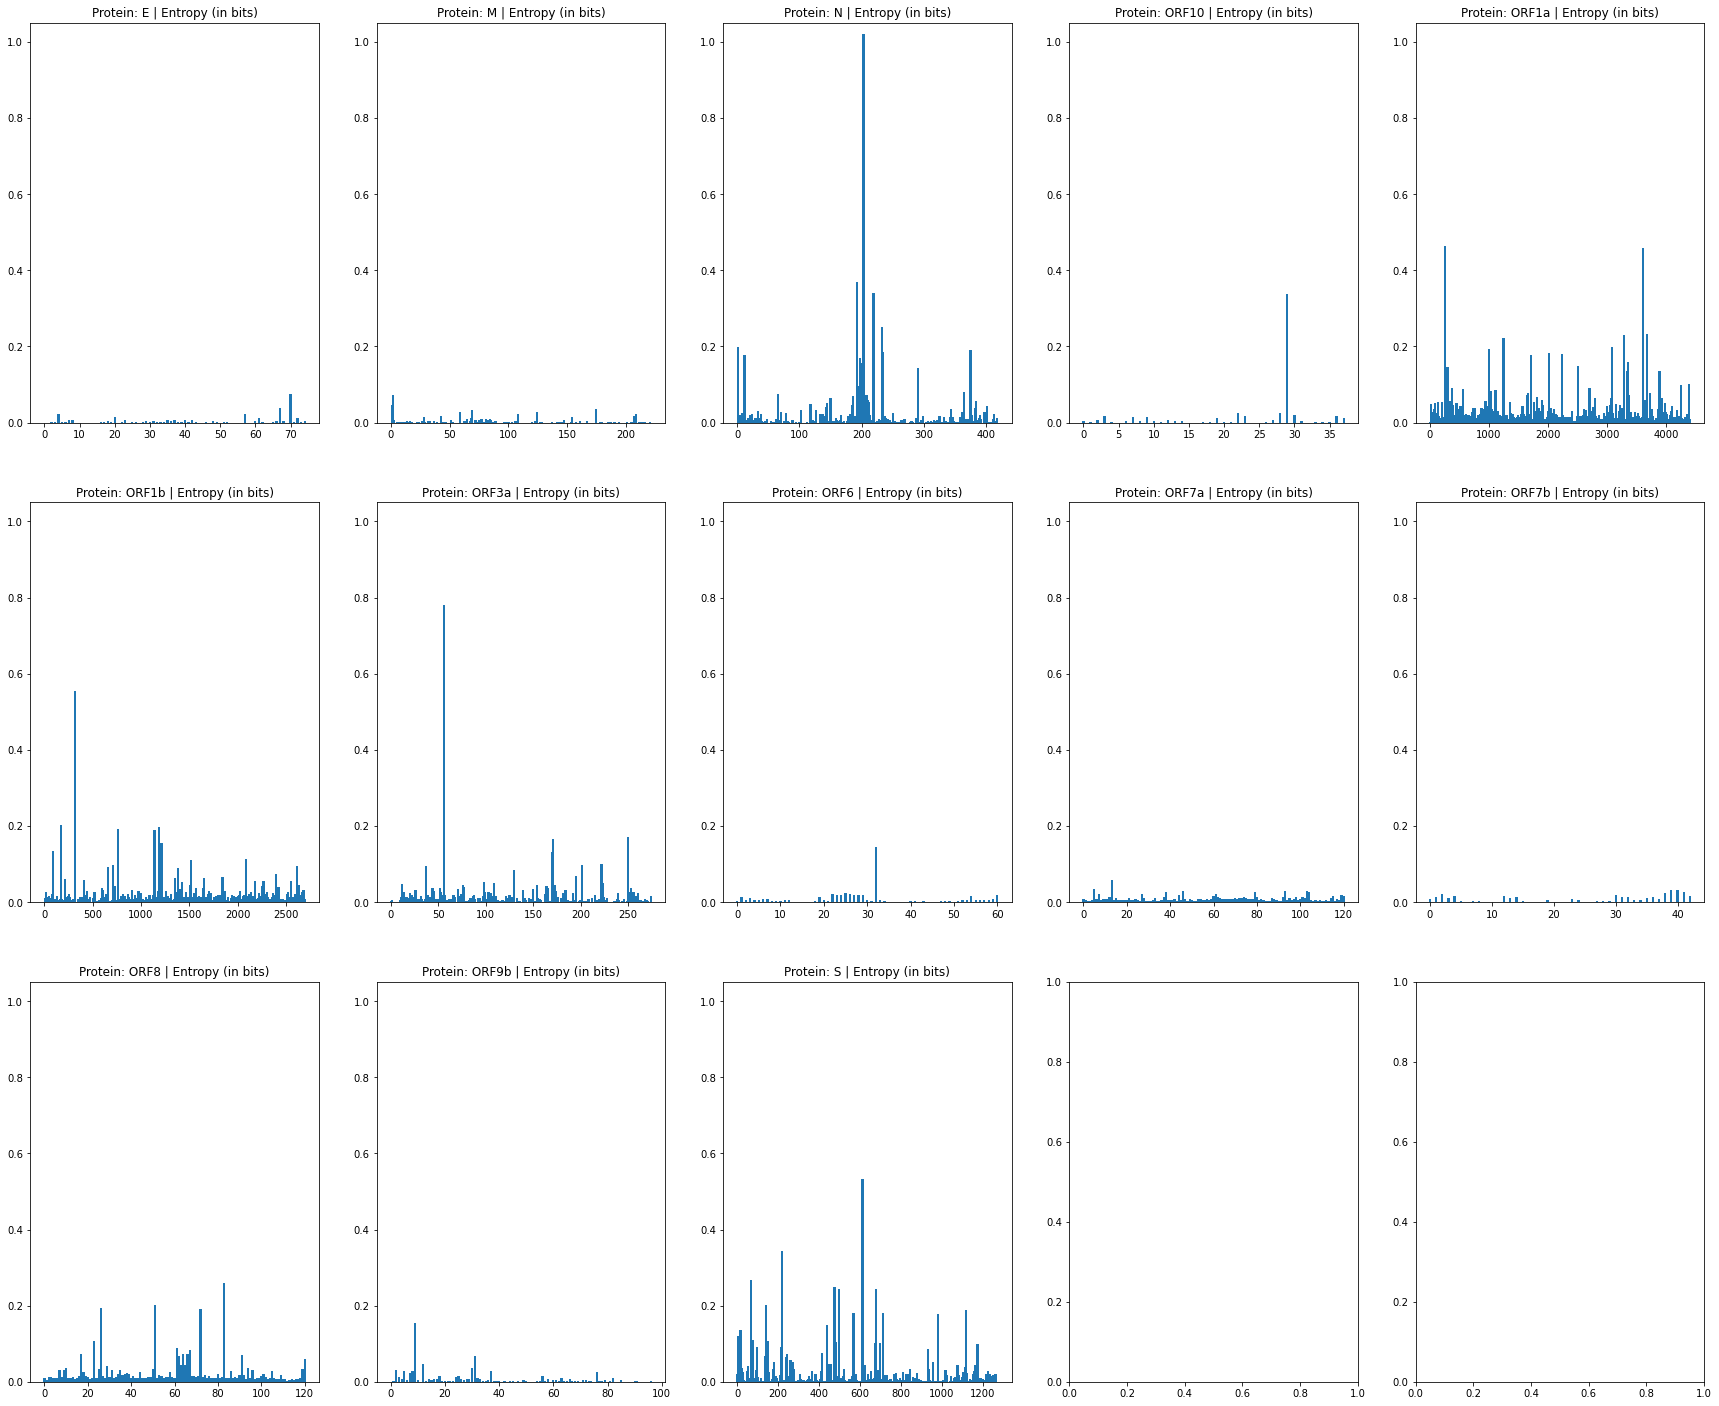

In [137]:

#rows, cols = 3,5
fig, ax = plt.subplots(rows,cols, figsize=(30,25))
for i in range(df.shape[0]):
    x_ind = i//cols
    y_ind = i%cols
    print(x_ind, y_ind)
    wid = len(df.iloc[i].entropies) / 120
    ax[x_ind, y_ind].set_ylim(0, 1.05)
    ax[x_ind, y_ind].bar(np.arange(len(df.iloc[i].entropies)), 
                         df.iloc[i].entropies, width=wid)
    
    ax[x_ind, y_ind].set_title('Protein: '+df.iloc[i].protein+' | Entropy (in bits)')

0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4
2 0
2 1
2 2


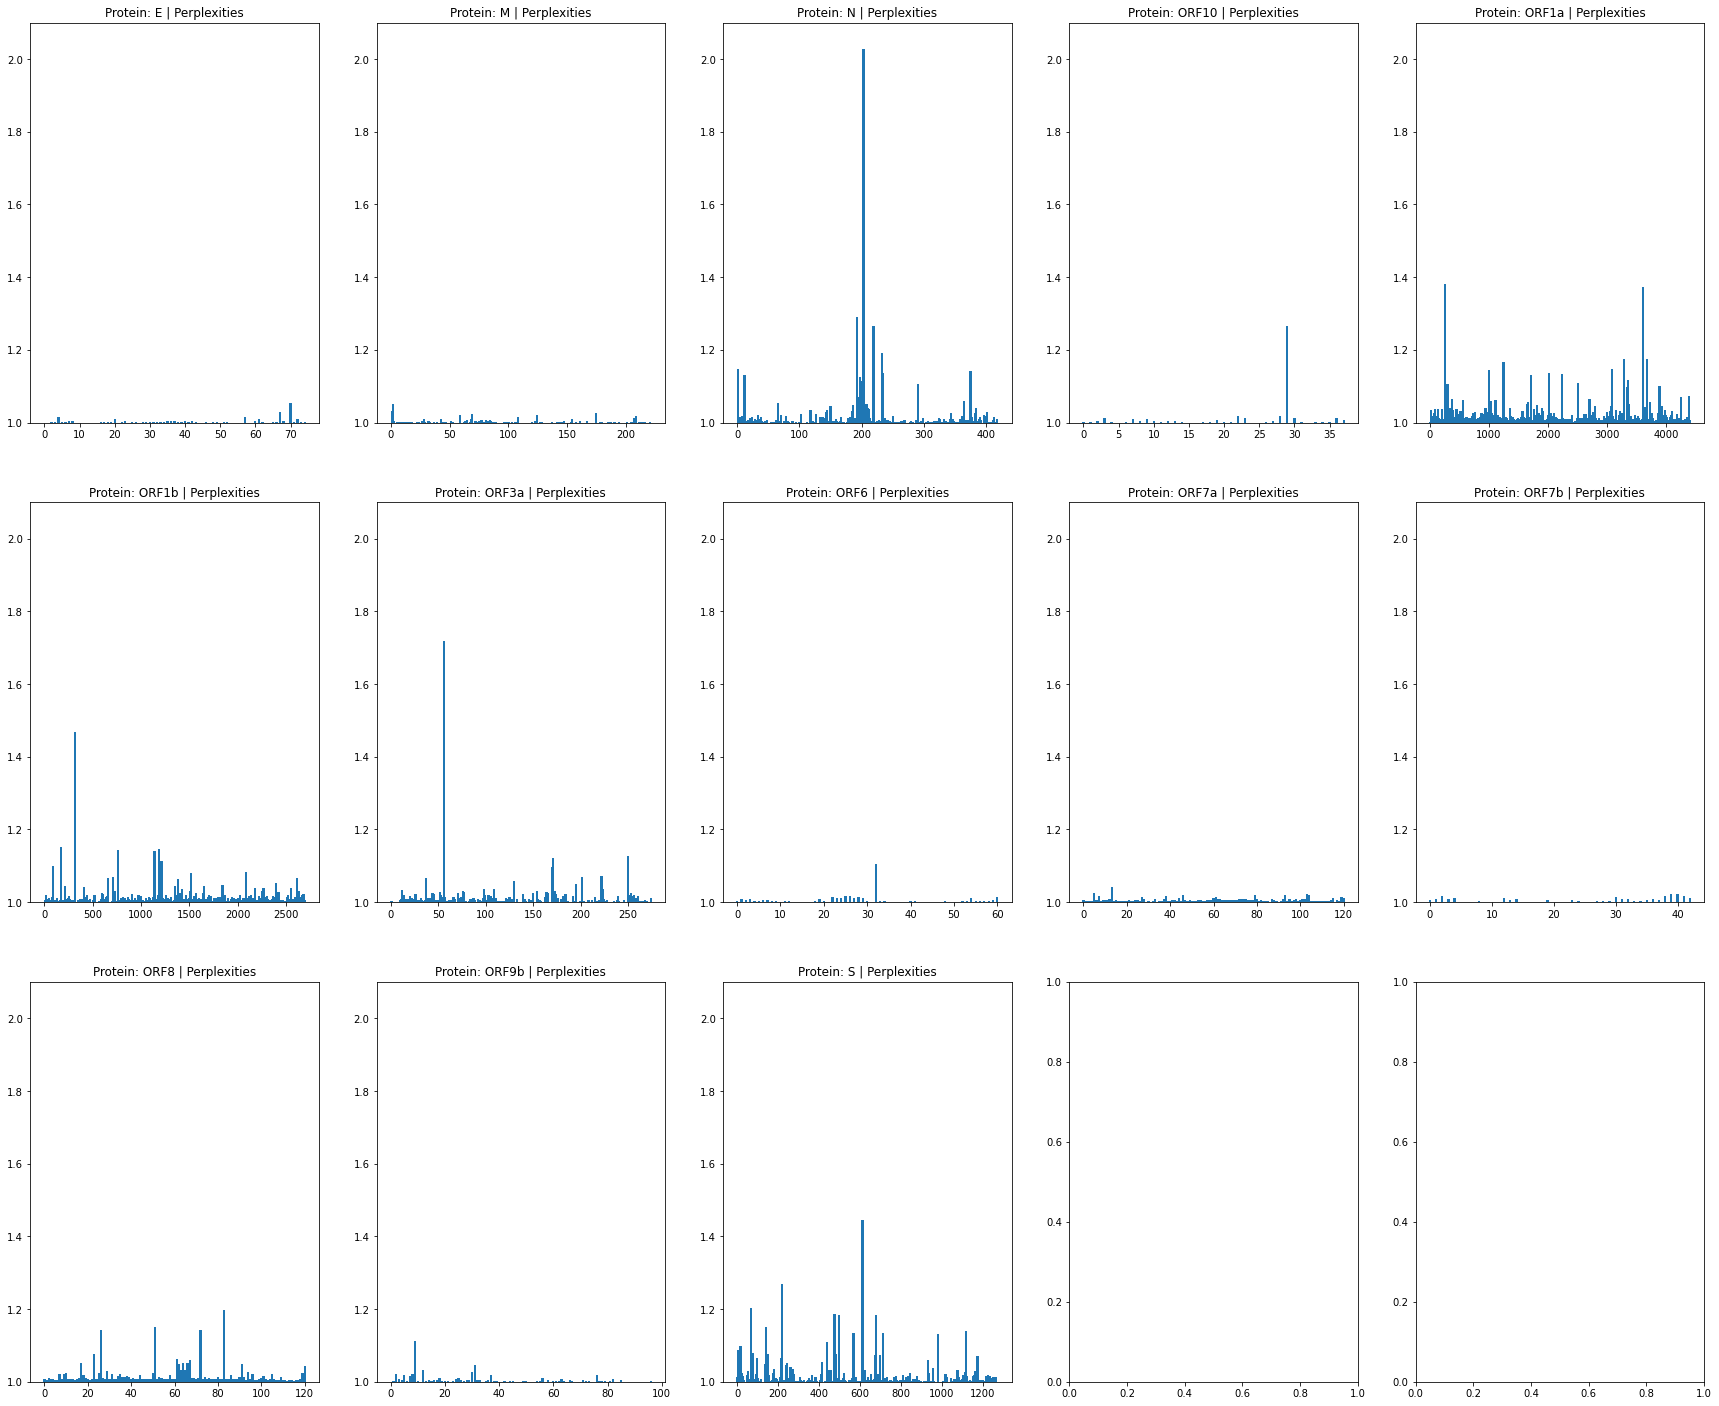

In [138]:
#PERPLEXITIES

#rows, cols = 3,5
fig, ax = plt.subplots(rows,cols, figsize=(30,25))
for i in range(df.shape[0]):
    x_ind = i//cols
    y_ind = i%cols
    print(x_ind, y_ind)
    wid = len(df.iloc[i].perplexities) / 120
    ax[x_ind, y_ind].set_ylim(1.0, 2.1)
    ax[x_ind, y_ind].bar(np.arange(len(df.iloc[i].perplexities)), 
                         df.iloc[i].perplexities, width=wid)
    
    ax[x_ind, y_ind].set_title('Protein: '+df.iloc[i].protein+' | Perplexities')

In [139]:
# writing out all of the protein sequences:
seqs_to_save = []
import copy
#with open('reference_protein_sequences.txt', 'w') as f:
    #f.write('Protein'+'\t'+'Sequence'+'\n')
for aa_file in amino_acid_files:
    protein = aa_file.split('_')[-1].split('.')[0]
    with open(aa_file, "rt") as handle:
        records = list(SeqIO.parse(handle, "fasta"))

    # getting the reference sequence
    for ind, r in enumerate(records): 
#         if r.id == 'Wuhan/IPBCAMS-WH-01/2019': ### commented out by Alex
        if r.id == 'Wuhan-Hu-1/2019': ### --Alex
            ref_seq_ind = ind
            break 

    #ref_seq = str(records[ref_seq_ind].seq)[:-1]
    ref_seq = records[ref_seq_ind]
    print(protein, len(ref_seq))

    ref_seq.id = ref_seq.name+'_'+protein

    if protein == 'ORF1a':
        seq1 = copy.deepcopy(ref_seq)
        seq1.id = 'PART1_' + seq1.id
        seq1.seq = seq1.seq[:len(seq1.seq)//2]
        seq2 = copy.deepcopy(ref_seq)
        seq2.id = 'PART2_' + seq2.id
        seq2.seq = seq2.seq[len(seq2.seq)//2:]

        seq3 = copy.deepcopy(ref_seq)
        seq3.id = 'PART3_' + seq3.id
        seq3.seq = seq3.seq[2100: 2300]

        seqs_to_save.append(seq1)
        seqs_to_save.append(seq2)
        seqs_to_save.append(seq3)
    else: 
        seqs_to_save.append(ref_seq)
        
        #f.write(protein+'\t'+ref_seq+'\n')

E 76
M 223
N 420
ORF10 39
ORF1a 4401
ORF1b 2696
ORF3a 276
ORF6 62
ORF7a 122
ORF7b 44
ORF8 122
ORF9b 98
S 1274


In [140]:
seqs_to_save

[SeqRecord(seq=Seq('MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNIVNVSLVKP...LV*', SingleLetterAlphabet()), id='Wuhan-Hu-1/2019_E', name='Wuhan-Hu-1/2019', description='Wuhan-Hu-1/2019', dbxrefs=[]),
 SeqRecord(seq=Seq('MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFLYIIKLIFL...VQ*', SingleLetterAlphabet()), id='Wuhan-Hu-1/2019_M', name='Wuhan-Hu-1/2019', description='Wuhan-Hu-1/2019', dbxrefs=[]),
 SeqRecord(seq=Seq('MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLPNNTASWFT...QA*', SingleLetterAlphabet()), id='Wuhan-Hu-1/2019_N', name='Wuhan-Hu-1/2019', description='Wuhan-Hu-1/2019', dbxrefs=[]),
 SeqRecord(seq=Seq('MGYINVFAFPFTIYSLLLCRMNSRNYIAQVDVVNFNLT*', SingleLetterAlphabet()), id='Wuhan-Hu-1/2019_ORF10', name='Wuhan-Hu-1/2019', description='Wuhan-Hu-1/2019', dbxrefs=[]),
 SeqRecord(seq=Seq('MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHLKDGTCGLV...IAK', SingleLetterAlphabet()), id='PART1_Wuhan-Hu-1/2019_ORF1a', name='Wuhan-Hu-1/2019', description='Wuhan-Hu-1/2019', dbxrefs=[]),
 SeqRec

In [141]:
for s in seqs_to_save: 
    print(len(s.seq))

76
223
420
39
2200
2201
200
2696
276
62
122
44
122
98
1274


In [142]:
from Bio import SeqIO
with open('reference_protein_sequences_larger.fasta', 'w') as f: ### my new larger code --Alex
    SeqIO.write(seqs_to_save, f, 'fasta')

### Getting the mutations in the Receptor Binding Domain

In [143]:
df[df['protein']=='S'].sequence.str.index('GVGYQPY')

12    501
Name: sequence, dtype: int64

In [144]:
RBM = df[df['protein']=='S'].sequence.str[436:508].to_list()[0] # this is the binding motif that makes contact with ACE2
RBM_start = 436
RBM_end = 508
RBM

'NSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPY'

In [145]:
RBD = df[df['protein']=='S'].sequence.str[330:524].to_list()[0]
RBD

'NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATV'

In [146]:
df[df['protein']=='S']

,protein,sequence,entropies,perplexities
12,S,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,"[-0.0, 0.0023590895407301963, 0.01970254533116...","[1.0, 1.0016365339262705, 1.0137504433116207, ..."


In [147]:
pos_mut_counts[RBD_start:RBD_end];

Text(0.5, 1.0, 'RBD Entropy')

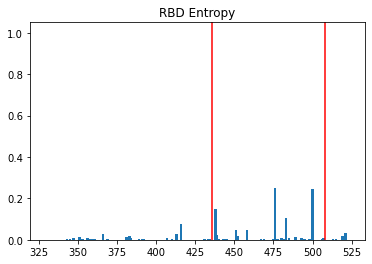

In [148]:
RBD_start = 330
RBD_end = 524

S_entropies = df[df['protein']=='S'].entropies.to_list()[0]

plt.figure()
wid = len(S_entropies[RBD_start:RBD_end]) / 120
plt.ylim(0, 1.05)
plt.bar(np.arange(RBD_start,RBD_end), S_entropies[RBD_start:RBD_end], width=wid)
plt.axvline(RBM_start, color='red')
plt.axvline(RBM_end, color='red')
plt.title('RBD Entropy')


Text(0.5, 1.0, 'S Protein Entropy (in bits)')

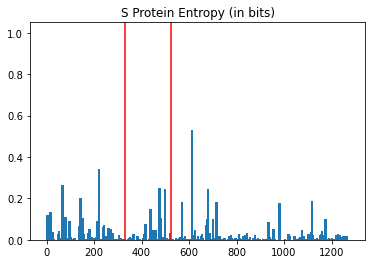

In [149]:
plt.figure()
plt.ylim(0, 1.05)
plt.bar(np.arange(0,len(S_entropies)), S_entropies, width=10.0)
plt.axvline(RBD_start, color='red')
plt.axvline(RBD_end, color='red')
plt.title('S Protein Entropy (in bits)')

In [150]:
len(S_entropies)

1273

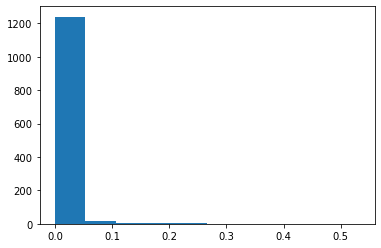

In [151]:
plt.hist(S_entropies)
plt.show()

In [152]:
max(S_entropies) # used to be 0.618...

0.5325506741022701

In [153]:
np.argmax(S_entropies)

613

In [154]:
df[df['protein']=='S'].sequence.str[485:508]

12    FNCYFPLQSYGFQPTNGVGYQPY
Name: sequence, dtype: object

## Collecting every possible epitope of window sizes from 8 - 25 and getting the sum of their entropies

In [155]:

df_epi = []
window_sizes = list(range(8,26))
for i in range(df.shape[0]):
    print('index of df:', i)
    for window in window_sizes:
        seq = df.iloc[i].sequence
        ents = df.iloc[i].entropies
        
        epitopes = [seq[i:i+window] for i in range(len(seq)-window+1)]
        epi_ents = [sum(ents[i:i+window]) for i in range(len(seq)-window+1)]
        
        counter = 0 # recording where this epitope segment started in the protein. 
        for epi, ent in zip(epitopes, epi_ents):
            df_epi.append([df.iloc[i].protein, epi, ent, counter])
            counter+=1
    

index of df: 0
index of df: 1
index of df: 2
index of df: 3
index of df: 4
index of df: 5
index of df: 6
index of df: 7
index of df: 8
index of df: 9
index of df: 10
index of df: 11
index of df: 12


In [157]:
df_epi = pd.DataFrame(df_epi, columns =['protein', 'sequence', 'entropy_sum', 'epi_start_pos'] )
df_epi.head()

,protein,sequence,entropy_sum,epi_start_pos
0,E,MYSFVSEE,0.035581,0
1,E,YSFVSEET,0.042301,1
2,E,SFVSEETG,0.042301,2
3,E,FVSEETGT,0.041122,3
4,E,VSEETGTL,0.038919,4


In [159]:
df_epi.shape

(173493, 4)

In [160]:
df_epi.tail()

,protein,sequence,entropy_sum,epi_start_pos
173488,S,KGCCSCGSCCKFDEDDSEPVLKGVK,0.120267,1244
173489,S,GCCSCGSCCKFDEDDSEPVLKGVKL,0.117100,1245
173490,S,CCSCGSCCKFDEDDSEPVLKGVKLH,0.117100,1246
173491,S,CSCGSCCKFDEDDSEPVLKGVKLHY,0.101738,1247
173492,S,SCGSCCKFDEDDSEPVLKGVKLHYT,0.100559,1248


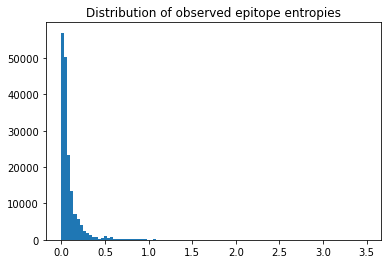

In [162]:
plt.hist(df_epi.entropy_sum, bins=100)
plt.title('Distribution of observed epitope entropies')
plt.show()

In [163]:
df_epi.to_csv('data/processed/epitope_entropies_larger.csv', index=False)

In [164]:
df.head()

,protein,sequence,entropies,perplexities
0,E,MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNI...,"[-0.0, -0.0, 0.0011795491810428478, 0.00220270...","[1.0, 1.0, 1.000817935516133, 1.00152796501366..."
1,M,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,"[-0.0, 0.04597049747023445, 0.0717044160613552...","[1.0, 1.0323774235668415, 1.0509575635070916, ..."
2,N,MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLP...,"[-0.0, 0.05493851816114793, 0.1976833935443112...","[1.0, 1.0388148322596233, 1.1468553136214392, ..."
3,ORF10,MGYINVFAFPFTIYSLLLCRMNSRNYIAQVDVVNFNLT,"[0.003382236685534581, 0.0011795491810428478, ...","[1.0023471380484748, 1.000817935516133, 1.0052..."
4,ORF1a,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,"[-0.0, -0.0, -0.0, 0.0011795491810428478, 0.00...","[1.0, 1.0, 1.0, 1.000817935516133, 1.001527965..."


In [165]:
df.to_csv('data/processed/sequences_position_entropies_larger.csv', index=False)